# Linear Regression

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Food-Truck-LineReg.csv", header=None, names=["x", "y"])
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


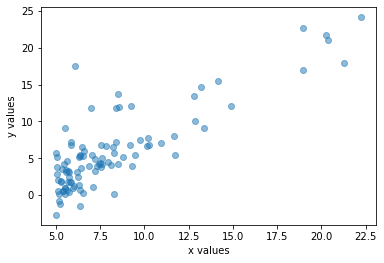

In [19]:
plt.scatter(df["x"], df["y"], s=None, c=None, alpha=0.5)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [23]:
# corr_matrix = df.corr()
# plt.figure(figsize=(20,15))
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [55]:
x = df["x"].tolist()
y = df["y"].tolist()

def split_data(X, Y, split):
    '''
    return X_train, X_test, y_train, y_test
    '''
    x_len = len(X)
    y_len = len(Y)
    if x_len != y_len:
        return -1,-1,-1,-1
    
    if split * 100 > 100:
        return -1, -1, -1, -1
    
    return X[0:int(split*x_len)], X[int(split*x_len)+1:len(x)], Y[0:int(split*y_len)], Y[int(split*y_len)+1:len(Y)]

X_train, X_test, y_train, y_test = split_data(x,y, 0.8)

print(X_train, "\n\n", X_test)

x_2 = [numx ** 2 for numx in x]
y_2 = [numy **2 for numy in y]


xy = []
for i in range(0, len(x)):
    xy.append(x[i] * y[i])
        
r = sum(xy) / (sum(x_2) * sum(y_2))
print("R=",r)


[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164000000000001, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.175999999999998, 22.203000000000003, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.835999999999999, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.340999999999998, 10.136000000000001, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386] 

 [10.274000000000001, 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002000000000001, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
R= 0.00012897984786377177


In [40]:
def standard_dev(array):
    length = len(array)
    mean = sum(array)/length
    sq_diff = []
    for i in range(0, length):
        sq_diff.append((array[i] - mean) **2)
    sd = (sum(sq_diff)/length) ** 0.5
    return sd

In [42]:
sd_x = standard_dev(x)
sd_y = standard_dev(y)

print(sd_x)
print(sd_y)

3.8498839959227156
5.48178525707763


In [43]:
# slope
m = r * (sd_y / sd_x)
print(m)

0.00018365224230874023


In [47]:
# y intercept
c = (sum(y)/len(y)) - (m*(sum(x)/len(y)))
print(c)

5.8376364859795995


In [48]:
# y predicted
y_pred = []
for num in x:
    y_pred.append(m*num + c)
    
print(y_pred)

[5.83875861954533, 5.838651660479409, 5.839200945970931, 5.838922639362936, 5.838712651389081, 5.83917602436165, 5.839009543603996, 5.839211873279348, 5.8388276911536625, 5.838564774603573, 5.838685268839752, 5.8402377363396605, 5.838689547936998, 5.839180707493829, 5.83867241318279, 5.838624424851875, 5.8388055059627915, 5.838578640347867, 5.838817296436748, 5.838935054254516, 5.838773128072472, 5.841359116931198, 5.838644755155099, 5.838798288429669, 5.838658492342823, 5.841115777710138, 5.839992376943936, 5.839648763598577, 5.840056287924259, 5.841714116715581, 5.838601101017102, 5.838846644065069, 5.839334938646919, 5.838718528260834, 5.839144472906421, 5.839093472678732, 5.839123316168107, 5.838666095545655, 5.839993846161875, 5.838803302135884, 5.838629475288538, 5.838900472537289, 5.83978668643255, 5.838696838931018, 5.839073509679992, 5.838939149699519, 5.838567639578553, 5.838701926098129, 5.839785217214612, 5.838654213245578, 5.839021260617056, 5.838611256986102, 5.8389999018

In [51]:
# error stuff
raw_error = []
for i in range(0,len(y)):
    raw_error.append(y[i] - y_pred[i])
    
sse = sum([num ** 2 for num in raw_error])
mse = sse/len(x)
rmse = mse ** 0.5

print(sse)
print(mse)
print(rmse)

2914.2170923231056
30.043475178588718
5.481192860918937


In [59]:
# coefficient of determination
rss_values = []
for i in range(0, len(y)):
    rss_values.append((y[i] - y_pred[i])**2)
rss = sum(rss_values)
print(rss)

mean = sum(y)/len(y)
tss = sum([(num - mean) ** 2 for num in y])
print(tss)

r_2 = 1-(rss/tss)

print(r_2)

2914.2170923231056
2914.8470516572247
0.00021612088831934884


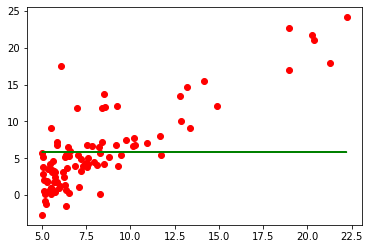

In [56]:
plt.scatter(x, y, color="red")
plt.plot(x, y_pred, color="green")
plt.show()

In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.0002161208883196819
